<a href="https://colab.research.google.com/github/jaewoong-87/deep_learning/blob/main/Gradient_Decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

convex function

non convex function

global , local - maximum or minimum

In [1]:
def f1(x):
  return x**2

def df_dx1(x):
  return 2*x

In [2]:
def gradient_descent(f, df_dx, init_x, learning_rate=0.01, step_num=100):
  x = init_x
  x_log, y_log = [x],[f(x)]

  for i in range(step_num):
    grad = df_dx(x)
    x -= learning_rate * grad

    x_log.append(x)
    y_log.append(f(x))

    return x_log, y_log

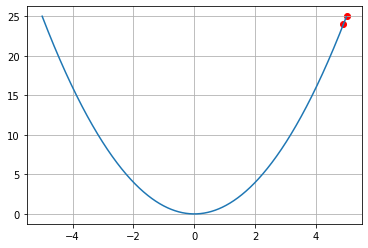

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x_init=5
x_log, y_log = gradient_descent(f1, df_dx1, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x =np.arange(-5,5, 0.01)
plt.plot(x, f1(x))
plt.grid()
plt.show()

In [7]:
def f2(x):
  return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df_dx2(x):
  return 0.04*x**3 - 0.9*x**2 - 1.0

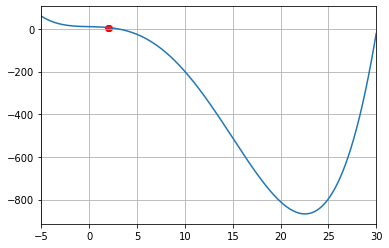

In [9]:
x_init = 2
x_log, y_log = gradient_descent(f2, df_dx2, init_x=x_init)

plt.scatter(x_log, y_log, color='red')
x = np.arange(-5, 30, 0.01)
plt.plot(x, f2(x))
plt.xlim(-5, 30)
plt.grid()
plt.show()

In [10]:
def f3(x):
  return x*np.sin(x**2) + 1

def df_dx3(x):
  return np.sin(x**2) + x*np.cos(x**2)*2*x

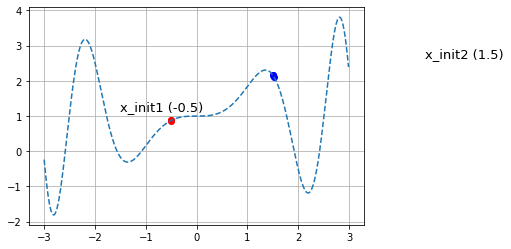

In [19]:
x_init1 = - 0.5
x_log1, y_log1 = gradient_descent(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = 1.5
x_log2, y_log2 = gradient_descent(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')

x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1-1.0, f3(x_init1)+0.3, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init2+3.0, f3(x_init2)+0.5, "x_init2 ({})".format(x_init2), fontsize=13)
plt.grid()
plt.show()

In [27]:
def gradient_descent2(f, df_dx, init_x, learning_rate=0.01, step_num=100):
  eps = 1e-5
  count = 0

  old_x = init_x
  min_x = old_x
  min_y = f(min_x)

  x_log, y_log = [min_x],[min_y]
  for i in range(step_num):
    grad = df_dx(old_x)
    new_x = old_x - learning_rate * grad
    new_y = f(new_x)

    if min_y > new_y:
      min_x = new_x
      min_y = new_y

    if np.abs(old_x - new_x) < eps:
      break

    x_log.append(old_x)
    y_log.append(new_y)

    old_x = new_x
    count +=1

    return x_log, y_log, count

count1: 1
count2: 1
count3: 1


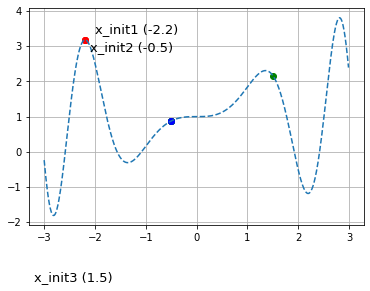

In [28]:
x_init1 = -2.2
x_log1, y_log1, count1 = gradient_descent2(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')
print("count1:", count1)

x_init2 = -0.5
x_log2, y_log2, count2 = gradient_descent2(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')
print("count2:", count2)
x_init3 = 1.5
x_log3, y_log3, count3 = gradient_descent2(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log3, y_log3, color='green')
print("count3:", count3)


x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1+0.2, f3(x_init1)+0.2, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init1+0.1, f3(x_init1)-0.3, "x_init2 ({})".format(x_init2), fontsize=13)

plt.scatter(x_init3, f3(x_init3), color='green')
plt.text(x_init1-1.0, f3(x_init)+0.4, "x_init3 ({})".format(x_init3), fontsize=13)

plt.grid()
plt.show()

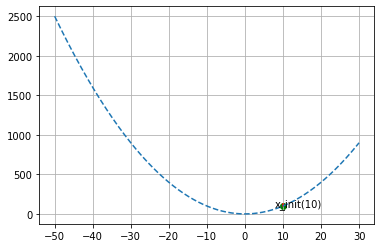

In [33]:
x_init = 10
x_log, y_log, _ = gradient_descent2(f1, df_dx1, init_x=x_init, learning_rate=1.05)
plt.plot(x_log, y_log, color='red')

plt.scatter(x_init, f1(x_init), color='green')
plt.text(x_init-2.2, f1(x_init)-2, "x_init({})".format(x_init), fontsize=10)
x= np.arange(-50, 30, 0.01)
plt.plot(x, f1(x), '--')
plt.grid()
plt.show()

init value = 0.001, count=1
init value = 0.01, count=1
init value = 0.1, count=1
init value = 1.01, count=1


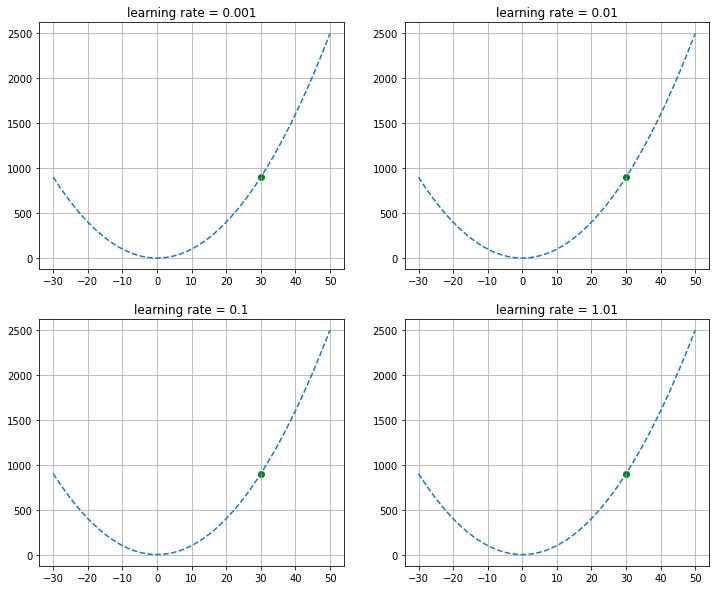

In [30]:
lr_list = [0.001, 0.01, 0.1, 1.01]

init_x = 30.0
x = np.arange(-30, 50, 0.01)
fig = plt.figure(figsize=(12, 10))

for i, lr in enumerate(lr_list):
  x_log, y_log, count = gradient_descent2(f1, df_dx1, init_x=x_init, learning_rate=lr)
  ax=fig.add_subplot(2,2, i+1)
  ax.scatter(init_x, f1(init_x), color='green')
  ax.plot(x, f1(x), '--')
  ax.grid()
  ax.title.set_text('learning rate = {}'.format(str(lr)))
  print("init value = {}, count={}".format(str(lr), str(count)))

plt.show()

saddle point

count1: 1
count2: 1
count3: 1


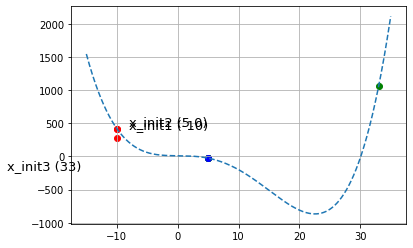

In [31]:
x_init1 = -10
x_log1, y_log1, count1 = gradient_descent2(f2, df_dx2, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')
print("count1:", count1)

x_init2 = 5.0
x_log2, y_log2, count2 = gradient_descent2(f2, df_dx2, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')
print("count2:", count2)
x_init3 = 33
x_log3, y_log3, count3 = gradient_descent2(f2, df_dx2, init_x=x_init2)
plt.scatter(x_log3, y_log3, color='green')
print("count3:", count3)


x = np.arange(-15, 35, 0.01)
plt.plot(x, f2(x), '--')

plt.scatter(x_init1, f2(x_init1), color='red')
plt.text(x_init1+2.0, f2(x_init1), "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f2(x_init2), color='blue')
plt.text(x_init1+2, f2(x_init1)+53, "x_init2 ({})".format(x_init2), fontsize=13)

plt.scatter(x_init3, f2(x_init3), color='green')
plt.text(x_init1-18, f2(x_init), "x_init3 ({})".format(x_init3), fontsize=13)

plt.grid()
plt.show()

count1: 1
count2: 1


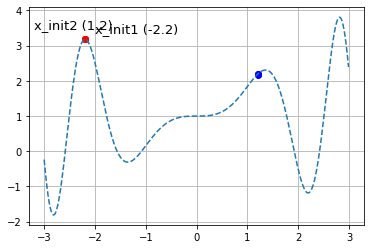

In [32]:
x_init1 = -2.2
x_log1, y_log1, count1 = gradient_descent2(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')
print("count1:", count1)

x_init2 = 1.2
x_log2, y_log2, count2 = gradient_descent2(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')
print("count2:", count2)



x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1+0.2, f3(x_init1)+0.2, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init1-1.0, f3(x_init1)+0.3, "x_init2 ({})".format(x_init2), fontsize=13)


plt.grid()
plt.show()